<a href="https://colab.research.google.com/github/RahulParajuli/MachineLearningAlgorithms-Implementations/blob/main/UsingSklearnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

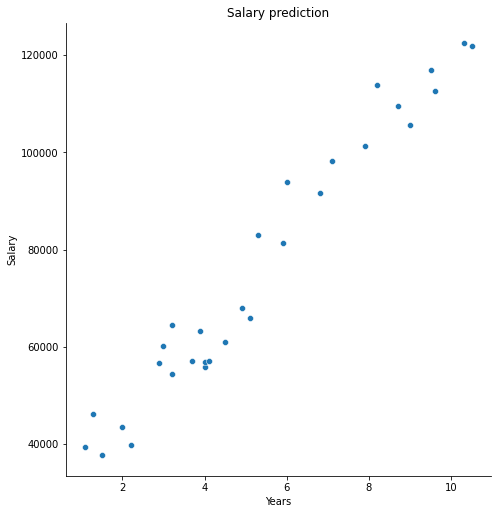

In [ ]:
plt.figure(figsize = (12,6))
sns.pairplot(data, x_vars = ["YearsExperience"], y_vars=["Salary"], size=7, kind='scatter')
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary prediction")
plt.show()

In [ ]:
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [ ]:
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [ ]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

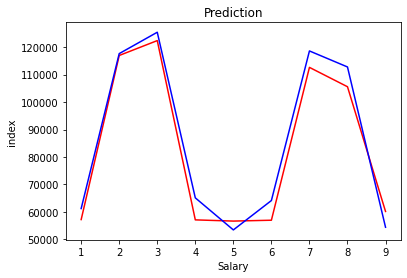

In [ ]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test, color='r', linestyle='-')
plt.plot (c, y_pred, color="b", linestyle='-')
plt.xlabel("Salary")
plt.ylabel("index")
plt.title("Prediction")
plt.show()

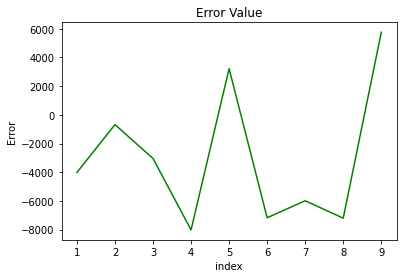

In [ ]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
rsq = r2_score(y_test,y_pred)

In [ ]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 30310299.043402452
r square : 0.9627668685473267


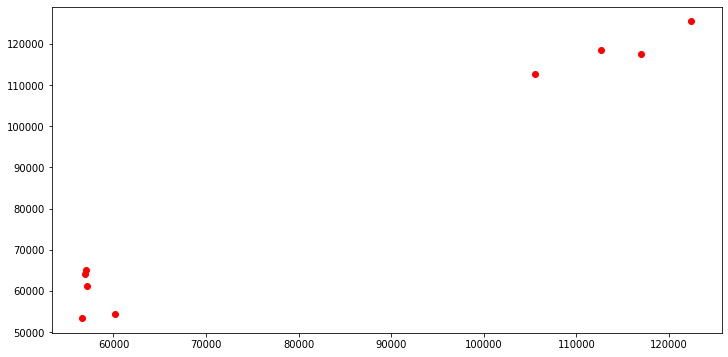

In [ ]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [ ]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)
m = lr.intercept_
b = lr.coef_

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]


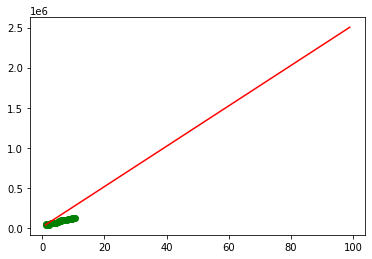

In [ ]:
plt.scatter(data['YearsExperience'], data['Salary'], color="green")
plt.plot(list(range(1,100)), [m*x+b for x in range(1,100)], color = "red")
plt.show()

# Using reshape

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("/content/Salary_Data.csv")

In [15]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
X = df['YearsExperience']
y = df['Salary']

In [23]:
X = X.values.reshape(-1,1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

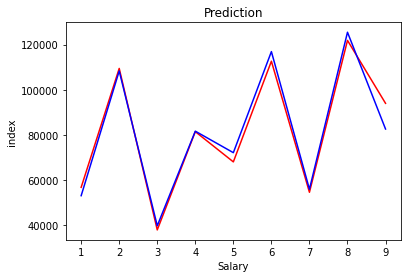

In [32]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test, color='r', linestyle='-')
plt.plot (c, y_pred, color="b", linestyle='-')
plt.xlabel("Salary")
plt.ylabel("index")
plt.title("Prediction")
plt.show()

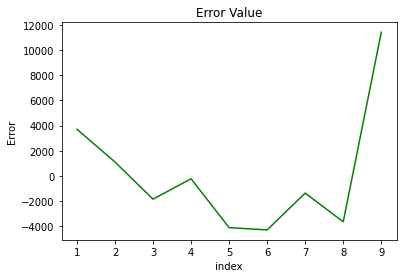

In [33]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [34]:
from sklearn.metrics import r2_score,mean_squared_error

In [35]:
mse = mean_squared_error(y_test, y_pred)

In [36]:
rse = r2_score(y_test, y_pred)

In [37]:
print("Mean square error is : ", mse)
print("R2 score is : ", rse)

Mean square error is :  22060700.65737978
R2 score is :  0.9715674081458407


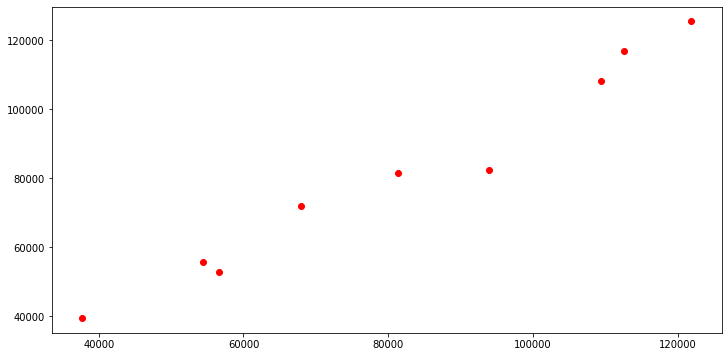

In [38]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [39]:
print("Intercept of the line is : ", lr.intercept_)
print("coefficient of the line is : ", lr.coef_)
m = lr.intercept_
c = lr.coef_

Intercept of the line is :  25238.909944491134
coefficient of the line is :  [9548.73720495]


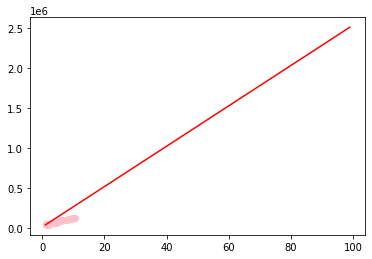

In [42]:
plt.scatter(df['YearsExperience'], df['Salary'], color = "pink")
plt.plot(list(range(1,100)), [m*x+c for x in range(1,100)], color= "red")
plt.show()

In [49]:
print(y_pred)

[ 52930.24783885 108312.92362756  39562.01575192  81576.4594537
  72027.72224875 116906.78711201  55794.86900033 125500.65059647
  82531.33317419]


In [51]:
y_test.head()

5      56642.0
24    109431.0
2      37731.0
18     81363.0
15     67938.0
Name: Salary, dtype: float64